# Demo 2D to 3D Gromov-Wasserstein

In [1]:
import sys
sys.path.append('C:/Users/Erwan/Desktop/Stage_2A/Gromov-Wasserstein/codes/gw')
import gromov
import mapping
import scipy as sp
import numpy as np
import ot
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D

# Data definition

In [2]:
n=20 # nb samples

mu_s=np.array([0,0])
cov_s=np.array([[1,0],[0,1]])

mu_t=np.array([4,4,4])
cov_t=np.array([[1,0,0],[0,1,0],[0,0,1]])

xs=ot.datasets.get_2D_samples_gauss(n,mu_s,cov_s)
P=sp.linalg.sqrtm(cov_t)
xt= np.random.randn(n,3).dot(P)+mu_t

Distribution generation :

In [3]:
p=ot.unif(n)
p=p.reshape(1,len(p)).T
q=ot.unif(n)
q=q.reshape(1,len(q)).T

Cost matrix generation :

In [4]:
C1=sp.spatial.distance.cdist(xs,xs)

C2=sp.spatial.distance.cdist(xt,xt)

C1/=C1.max()
C2/=C2.max()

# Plot dataset

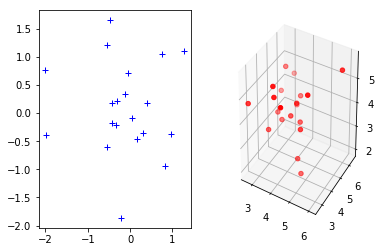

In [5]:
fig=pl.figure()

ax1=fig.add_subplot(121)

ax1.plot(xs[:,0],xs[:,1],'+b',label='Source samples')

ax2=fig.add_subplot(122,projection='3d')

ax2.scatter(xt[:,0],xt[:,1],xt[:,2],color='r')

pl.show()

# Plot cost matrices

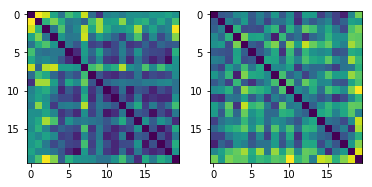

In [6]:
pl.subplot(121)

pl.imshow(C1)

pl.subplot(122)

pl.imshow(C2)

pl.show()

# Solve Gromov-Wasserstein

In [7]:
gw=gromov.gromov_wasserstein(C1,C2,p,q,'square_loss',5e-4)

# GW Matrix plot

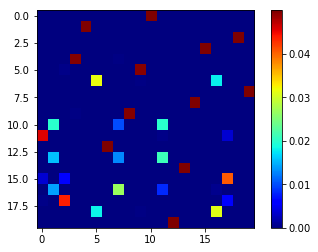

In [8]:
pl.imshow(gw,cmap='jet')
pl.colorbar()
pl.show()